In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
from fastai import *
from fastai.vision import *

In [ ]:
pwd

In [ ]:
cd ~/course-v3/

In [5]:
pwd

In [6]:
ls

In [7]:
ls projects/breast-histo-PTM/dfs/

In [8]:
df = pd.read_csv('./projects/breast-histo-PTM/dfs/20181213-path-class.csv'); df.head()

# make databunch

In [9]:
path = Path('.')

get_transforms() is in fastai/fastai/vision/transform.py
https://github.com/fastai/fastai/blob/master/fastai/vision/transform.py

In [10]:
# doc(get_transforms) 

In [11]:
# tfms = get_transforms(do_flip=True, 
#                       flip_vert=True, 
#                       max_rotate=4., 
#                       max_zoom=1.1, 
#                       max_lighting=0.2, 
#                       max_warp=0., 
#                       p_affine=0.75, 
#                       p_lighting=0.75)

What does get_transmforms() return? 
- rand_crop() and crop_pad() 
    - both return arguments that are put into a list
- get_transforms() then puts these lists into a tuple

What does .transform() expect?
- a tuple of lists from rand_crop() and crop_pad()

Can these lists be empty???
- .transform(([], []), size=X) NO!!!
- need .transform(([rand_crop()], [crop_pad()]), size=X)

In [12]:
data = (ImageItemList.from_df(df=df, path=path, cols='fpaths')
                     .random_split_by_pct(valid_pct=0.2, seed=10)
                     .label_from_df(cols='class_label')
                     .transform(([rand_crop()], [crop_pad()]), size=49)
                     .databunch(bs=128))

In [13]:
# note that exporting & importing a csv has turned my classes from srings to ints
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

([0, 1], 2, 222020, 55504)

In [14]:
data

ImageDataBunch;

Train: LabelList
y: CategoryList (222020 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: .
x: ImageItemList (222020 items)
[Image (3, 50, 50), Image (3, 50, 50), Image (3, 50, 50), Image (3, 50, 50), Image (3, 50, 50)]...
Path: .;

Valid: LabelList
y: CategoryList (55504 items)
[Category 1, Category 0, Category 1, Category 1, Category 1]...
Path: .
x: ImageItemList (55504 items)
[Image (3, 50, 50), Image (3, 50, 50), Image (3, 50, 50), Image (3, 50, 50), Image (3, 50, 50)]...
Path: .;

Test: None

In [15]:
data.train_ds

LabelList
y: CategoryList (222020 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: .
x: ImageItemList (222020 items)
[Image (3, 50, 50), Image (3, 50, 50), Image (3, 50, 50), Image (3, 50, 50), Image (3, 50, 50)]...
Path: .

In [16]:
data.train_dl

DeviceDataLoader(dl=<torch.utils.data.dataloader.DataLoader object at 0x7fe2628a4d30>, device=device(type='cuda'), tfms=[], collate_fn=<function data_collate at 0x7fe2817a1730>)

# View Data

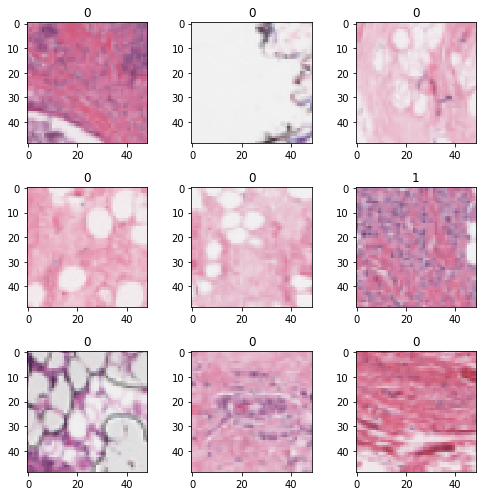

In [17]:
data.show_batch(rows=3, figsize=(7,7), hide_axis=False)

# Train a model

In [18]:
learn = create_cnn(data, models.resnet34, metrics=[error_rate, accuracy])

In [19]:
# 6 epochs
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,accuracy
1,0.365397,0.351079,0.150458,0.849542
2,0.329106,0.312080,0.132603,0.867397
3,0.303987,0.297661,0.125883,0.874117
4,0.304338,0.291488,0.122694,0.877306
5,0.299053,0.287349,0.121541,0.878459
6,0.289180,0.286652,0.121180,0.878820


# Unfreeze & figure out learning rates using nbs from lessons 1 & 2